In [2]:
import numpy as np
import numpy.linalg as linalg

# Aplicații în geometrie computațională

1. Distanța dintre două puncte
2. Aria unui triunghi
3. Matricea de rotație
4. Distanța de la un punct până la o dreaptă
5. Calcularea ariei unui polinom
6. Calcularea razei unui drum

In [41]:
from typing import Union, List
from numpy.typing import NDArray


# 1 Distanța dintre două puncte

def distanța_puncte(a: NDArray, b: NDArray):
    return np.sqrt(np.norm(a - b))


# 2 Aria unui triunghi

"""
Folosim determinantul:
| x1 y1 1 |
| x2 y2 1 |   =   d
| x3 y3 1 |
Și formula   A_triunghi = np.abs(d/2)
"""


def aria_triunghi(a: Union[NDArray, List],
                  b: Union[NDArray, List],
                  c: Union[NDArray, List]):
    a = np.matrix([
        [*a, 1],
        [*b, 1],
        [*c, 1]  # [*[1,2,3]] inseamna  [1, 2, 3],   iar   [*[1,2],1] == [1,2,1]
    ])
    d = linalg.det(a)
    return np.abs(d / 2)


print(aria_triunghi(
    [0, 0],
    [0, 1],
    [1, 0]
))
print(aria_triunghi(
    [0, 1],
    [4, 3],
    [4, 1]
))


# 3 Matricea de rotație

# Folositi o matrice de rotatie pentru a roti in jurul punctului [0,0], la 90 de grade, punctul  a=[2,3]
#  * va rezulta punctul [-3,2]

def genereaza_rotatie(alpha: float):
    radians = np.radians(alpha)
    cos = np.cos(radians)
    sin = np.sin(radians)
    return np.matrix([
        [cos, -sin],
        [sin, cos]
    ])


R = genereaza_rotatie(90)
print(R)
a = np.array([2, 3])
a_rotit = R @ a


# 4 Distanța de la un punct până la o dreaptă

# dreapta poate fi primita ca o ecuatie   a*x + b*y + c == 0   adica cele trei valori a, b, c
def distanta(p: NDArray, d: NDArray):
    if d.shape == (3,):
        # d contine a,b,c
        # distanta va fi   a*p[0] + b*p[1] + c
        # adica [a,b,c] * [p[0], p[1], 1],   adica d*np.hstack([p, [1]])
        numerator = np.dot(d, np.hstack([p, [1]]))
        denominator = linalg.norm(d[:2])  # adica linalg.norm([a,b])
        return numerator / denominator
    elif d.shape == (2,):  # slope and ..
        # y=mx*n   => a=m, b=-1, c=n
        m,n = d
        coef = np.array([m, -1, n])
        numerator = np.dot(coef, np.hstack([p, [1]]))
        denominator = linalg.norm([m, -1])
        return numerator / denominator
    elif d.shape == (2, 2):  # slope and ..
        # y=mx*n   => a=m, b=-1, c=n
        dx, dy = d[0] - d[1]
        m = dy / dx
        n = d[0][1] - m * d[0][0]
        coef = np.array([m, -1, n])
        numerator = np.dot(coef, np.hstack([p, [1]]))
        denominator = linalg.norm([m, -1])
        return numerator / denominator

# print(distanta(
#     [0, 0],
#     np.array([2, 3, 4])  # 2x + 3y + 4 == 0
# ))
# print(distanta(
#     [0, 0],
#     np.array([2, 3])  # 2x + 3y + 4 == 0
# ))
# print(distanta(
#     [0, 0],
#     np.array([[2, 3],[1, 0]])  # 2x + 3y + 4 == 0
# ))

# 5 Calcularea ariei unui polinom

# Aria polinomului va fi suma tuturor triunghiurilor formate cu 3 puncte consecutive din acesta, dar punem cu - punctele care nu reprezinta intoarcere spre stanga
polinom = np.array([
    [0, 0],
    [3, 0],
    [3, 2],
    [2, 1],
    [1, 2],
    [0, 2]
])

point = [0,0]
area = 0
for a, b in list(zip(polinom, polinom[1:]) + [polinom[0]]):
   area += linalg.det(
       np.matrix([
        [*a, 1],
        [*b, 1],
        [*point, 1],
    ])) / 2
print(area)


0.5
3.999999999999999
[[ 6.123234e-17 -1.000000e+00]
 [ 1.000000e+00  6.123234e-17]]
5.0


# Aplicații în inteligența artificială

1. K Nearest Neighbors

## K Nearest Neighbors

Algoritmul:

Pseudocod

De ce este un algoritm de învățare?

## Cerință

Vom grupa elevii unor clase despre care cunoaștem mediile la română, matematică și engleză:

In [8]:
note_elevi = np.array([
    [8, 7, 7],
    [9, 9, 9],
    [9, 9, 8],
    [6, 6, 8],
    [9, 7, 7],
    [7, 7, 7],
    [4, 4, 4],
    [5, 6, 8],
    [7, 6, 6],
    [4, 4, 4],
    [9, 10, 9],
    [10, 9, 9],
    [6, 6, 7],
    [7, 8, 5],
    [5, 5, 9],
    [3, 3, 3],
    [8, 8, 8],
    [6, 10, 9],
    [6, 8, 8],
    [9, 9, 9],
    [5, 6, 7],
    [2, 3, 3],
    [5, 7, 8],
    [4, 7, 4],
    [6, 6, 5],
])


def euclidian_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))


# Pasul 1 - alegem k = numărul de grupuri
k = 3

# Pasul 2 - alegem k indici din vector
indices = list(range(len(note_elevi)))
np.random.shuffle(indices)
centroids = [note_elevi[i] for i in indices[0:k]]

# calculam care indici sunt cei mai apropiati de fiecare centroid in parte

print(centroids)

for _ in range(100):
    groups = [[] for _ in range(k)]
    for note_elev in note_elevi:
        distances = [euclidian_distance(centroid, note_elev) for centroid in centroids]
        min_idx = 0
        min_distance = distances[0]
        for idx2, distance in enumerate(distances):
            if distance < min_distance:
                min_idx, min_distance = idx2, distance
        # print(min_idx, min_distance, distances)
        groups[min_idx].append(note_elev)

    centroids = [np.asarray(np.matrix(group).mean(0))[0] for group in groups]
    # print('centroids:', *centroids, sep='\n')

# Pasul 4
# folosim centroizii pentru a clasifica

[array([8, 7, 7]), array([7, 6, 6]), array([6, 8, 8])]


In [9]:
groups = [[] for _ in range(k)]
for i, note_elev in enumerate(note_elevi):
    distances = [euclidian_distance(centroid, note_elev) for centroid in centroids]
    min_idx = 0
    min_distance = distances[0]
    for idx2, distance in enumerate(distances):
        if distance < min_distance:
            min_idx, min_distance = idx2, distance
    # print(min_idx, min_distance, distances)
    groups[min_idx].append(i)
print(*groups, sep='\n')
color_of = {}
for group_id in range(len(groups)):
    for i in groups[group_id]:
        color_of[i] = group_id
print(color_of)

[1, 2, 4, 10, 11, 16, 17, 19]
[6, 9, 15, 21, 23]
[0, 3, 5, 7, 8, 12, 13, 14, 18, 20, 22, 24]
{1: 0, 2: 0, 4: 0, 10: 0, 11: 0, 16: 0, 17: 0, 19: 0, 6: 1, 9: 1, 15: 1, 21: 1, 23: 1, 0: 2, 3: 2, 5: 2, 7: 2, 8: 2, 12: 2, 13: 2, 14: 2, 18: 2, 20: 2, 22: 2, 24: 2}


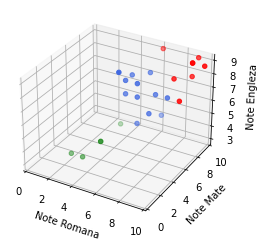

In [10]:
from mpl_toolkits.mplot3d import Axes3D
# # for .py files:
# import matplotlib
# matplotlib.use('Qt5Agg')
import matplotlib.pyplot as plt

fig = plt.figure()
ax: Axes3D = fig.add_subplot(projection='3d')

colors = ['red', 'forestgreen', 'royalblue']

ax.scatter3D(*note_elevi.T, c=[colors[color_of[i]] for i in range(len(note_elevi))])
ax.set_xlabel('Note Romana')
ax.set_ylabel('Note Mate')
ax.set_zlabel('Note Engleza ')
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)

fig.show()

In [11]:
# # num_pupils = 25
# # grades = []
# #
# # means = np.array([np.random.normal() for _ in range(num_pupils)])
# # if means.min() < 0:
# #     means -= means.min()
# # means *= 10 / means.max()
# #
# # print(np.ceil(means))
# # means[means < 5] += 2
# # print(np.ceil(means))
#
# means = [7, 10, 7, 7, 8, 6, 6, 7, 7, 4,
#          10, 10, 6, 6, 7, 5, 8, 8, 7, 8,
#          7, 2, 7, 6, 6]
#
# for mean in means:
#     # difference of 2:
#     low = mean - np.random.randint(0, 3)
#     if high < 1:
#         high = 1
#     high = mean + np.random.randint(0, 3)
#     if high > 10:
#         high = 10
#
#     print(np.random.random_integers(low, high, 3))
#
# np.random.random_integers(low, high)